In [101]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(6,4)

**Load the Data**

In [102]:
#Importing Data Set
ds= pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')


**View the data**

In [103]:
ds.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [104]:
ds.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [105]:
ds.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**Data Cleaning**

In [106]:
# check missing values in train data
ds.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [107]:
#no missing data
#nothing to replace

**Data Transformation**

In [108]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [109]:
#no categorical value to convert with "dummies" method

**Data exploration**

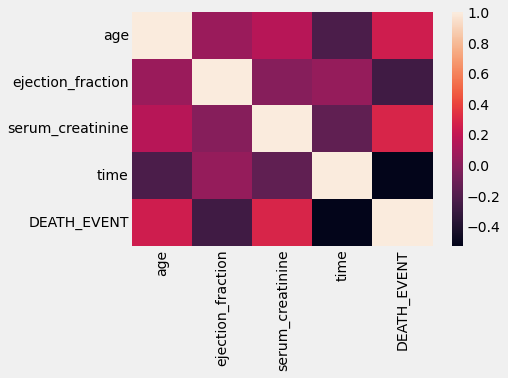

In [110]:
#Plotting a diagonal correlation matrix
#sns.heatmap(ds.corr())
price_cor=ds.corr()['DEATH_EVENT']
top_cor_feature=price_cor[price_cor.abs()>0.2].index
sns.heatmap(ds.corr().loc[top_cor_feature,top_cor_feature])

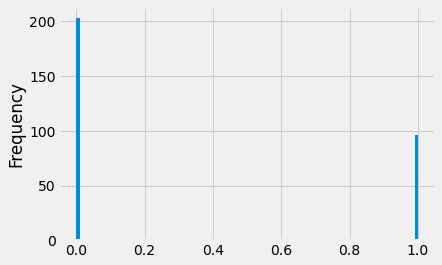

In [111]:
ds.DEATH_EVENT.plot.hist(bins=100)

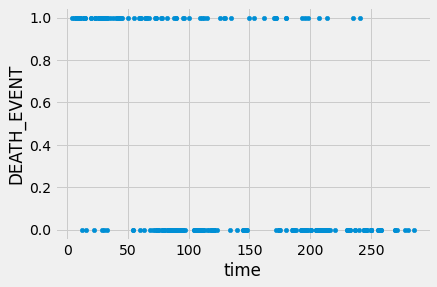

In [112]:
ds.plot.scatter(x='time',y='DEATH_EVENT')

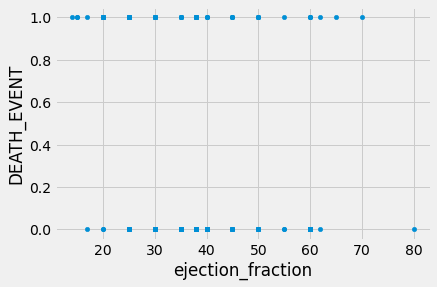

In [113]:
ds.plot.scatter(x='ejection_fraction',y='DEATH_EVENT')        

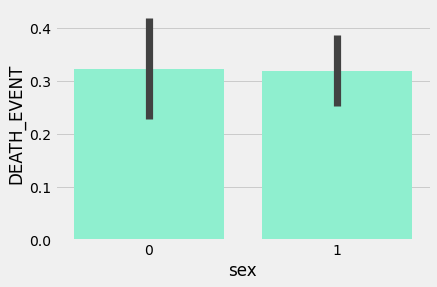

In [114]:
#Exploration of Gender variable
sns.barplot(x='sex', y='DEATH_EVENT', data=ds, color="aquamarine")
plt.show()

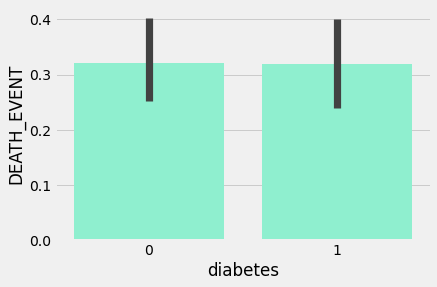

In [115]:
#Exploration of diabetes variable
sns.barplot(x='diabetes', y='DEATH_EVENT', data=ds, color="aquamarine")
plt.show()

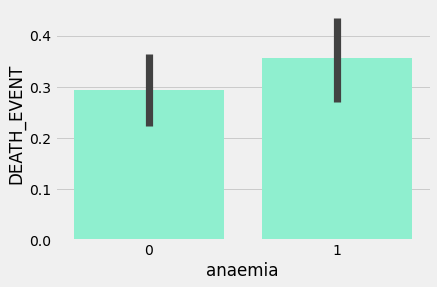

In [116]:
#Exploration of anaemia variable
sns.barplot(x='anaemia', y='DEATH_EVENT', data=ds, color="aquamarine")
plt.show()

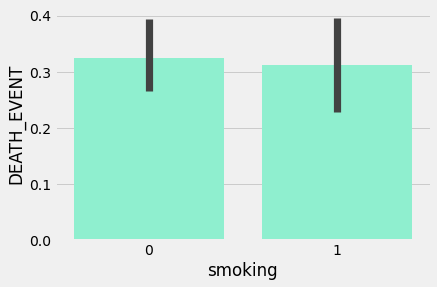

In [117]:
#Exploration of smoking variable
sns.barplot(x='smoking', y='DEATH_EVENT', data=ds, color="aquamarine")
plt.show()

**Data modeling**

In [118]:
#Divide the data into “attributes” and “labels”
X=ds.drop('DEATH_EVENT',axis=1) #separate the other attributes from the predicting attribute
y=ds['DEATH_EVENT']

In [119]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [127]:
# Model initialization
LogiscticReg_model = RandomForestClassifier()
# Fit the data(train the model)
LogiscticReg_model.fit(X_train,y_train)

y_pred=LogiscticReg_model.predict(X_test)

In [130]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9
